In [53]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, mean_squared_error
import seaborn as sb
import matplotlib.pyplot as plt
from math import sqrt
import pdb

In [54]:
train_df = pd.read_csv("train.csv").drop(["Id"], axis=1)
test_df = pd.read_csv("test.csv").drop(["Id"], axis=1)
train_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [55]:
train_df["Alley"]
train_df["Alley"].isna().any(axis=None)

True

In [56]:
cols_with_nan_none = ["Alley", "MasVnrType", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2",
                    "Electrical", "FireplaceQu", "GarageType", "GarageFinish", "GarageQual", "GarageCond", "PoolQC",
                     "Fence", "MiscFeature"]

cols = ["MSZoning", "Street", "LotShape", "LandContour", "Utilities", "LotConfig", "LandSlope", "Neighborhood", "Condition1", 
        "Condition2", "BldgType", "HouseStyle", "RoofStyle", "RoofMatl", "Exterior1st", "Exterior2nd", "ExterQual", 
        "ExterCond", "Foundation", "Heating", "HeatingQC", "CentralAir", "KitchenQual", "Functional", 
        "PavedDrive", "SaleType", "SaleCondition"]

cols_with_nan = ["LotFrontage", "MasVnrArea", "GarageYrBlt"]

In [57]:
def mapColsWithInteger(df, cols):
    for col in cols:
        hash = {}
        df[col].replace(to_replace=["None"], value=np.nan, inplace=True)
#         df[col] = df[col].fillna(df[col].median())
        if df[col].isna().any(axis=None):
            df[col] = df[col].fillna(0)
            ctr = 1
            arr = np.array(df[col])
            arr = arr[arr != 0]
            arr = np.unique(arr)
            hash[0] = 0
            length = len(arr) + 1
        else:
            ctr = 0
            arr = np.unique(np.array(df[col]))
            length = len(arr)
        print(str(col) + ": " + str(length))
        for ele in arr:
            hash[ele] = ctr
            ctr += 1
        df[col] = df[col].apply(lambda x: hash[x])
        
def handleNanAndNone(df, cols):
    for col in cols:
        df[col] = df[col].fillna(df[col].mean())

In [58]:
# handleNanAndNone(train_df, cols_with_nan_none)

mapColsWithInteger(train_df, cols + cols_with_nan_none)
handleNanAndNone(train_df, cols_with_nan)
train_df.head()

MSZoning: 5
Street: 2
LotShape: 4
LandContour: 4
Utilities: 2
LotConfig: 5
LandSlope: 3
Neighborhood: 25
Condition1: 9
Condition2: 8
BldgType: 5
HouseStyle: 8
RoofStyle: 6
RoofMatl: 8
Exterior1st: 15
Exterior2nd: 16
ExterQual: 4
ExterCond: 5
Foundation: 6
Heating: 6
HeatingQC: 5
CentralAir: 2
KitchenQual: 4
Functional: 7
PavedDrive: 3
SaleType: 9
SaleCondition: 6
Alley: 3
MasVnrType: 4
BsmtQual: 5
BsmtCond: 5
BsmtExposure: 5
BsmtFinType1: 7
BsmtFinType2: 7
Electrical: 6
FireplaceQu: 6
GarageType: 7
GarageFinish: 4
GarageQual: 6
GarageCond: 6
PoolQC: 4
Fence: 5
MiscFeature: 5


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,3,65.0,8450,1,0,3,3,0,4,...,0,0,0,0,0,2,2008,8,4,208500
1,20,3,80.0,9600,1,0,3,3,0,2,...,0,0,0,0,0,5,2007,8,4,181500
2,60,3,68.0,11250,1,0,0,3,0,4,...,0,0,0,0,0,9,2008,8,4,223500
3,70,3,60.0,9550,1,0,0,3,0,0,...,0,0,0,0,0,2,2006,8,0,140000
4,60,3,84.0,14260,1,0,0,3,0,2,...,0,0,0,0,0,12,2008,8,4,250000


In [59]:
mapColsWithInteger(test_df, cols + cols_with_nan_none)
test_df_nan_cols = ["BsmtFinSF1", "BsmtFinSF2", "BsmtUnfSF", "TotalBsmtSF", "BsmtFullBath", "BsmtHalfBath", 
                    "GarageCars", "GarageArea"]
handleNanAndNone(test_df, cols_with_nan + test_df_nan_cols)
test_df.head()

MSZoning: 6
Street: 2
LotShape: 4
LandContour: 4
Utilities: 2
LotConfig: 5
LandSlope: 3
Neighborhood: 25
Condition1: 9
Condition2: 5
BldgType: 5
HouseStyle: 7
RoofStyle: 6
RoofMatl: 4
Exterior1st: 14
Exterior2nd: 16
ExterQual: 4
ExterCond: 5
Foundation: 6
Heating: 4
HeatingQC: 5
CentralAir: 2
KitchenQual: 5
Functional: 8
PavedDrive: 3
SaleType: 10
SaleCondition: 6
Alley: 3
MasVnrType: 4
BsmtQual: 5
BsmtCond: 5
BsmtExposure: 5
BsmtFinType1: 7
BsmtFinType2: 7
Electrical: 4
FireplaceQu: 6
GarageType: 7
GarageFinish: 4
GarageQual: 5
GarageCond: 6
PoolQC: 3
Fence: 5
MiscFeature: 4


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,3,80.0,11622,1,0,3,3,1,4,...,120,0,0,3,0,0,6,2010,9,4
1,20,4,81.0,14267,1,0,0,3,1,0,...,0,0,0,0,1,12500,6,2010,9,4
2,60,4,74.0,13830,1,0,0,3,1,4,...,0,0,0,3,0,0,3,2010,9,4
3,60,4,78.0,9978,1,0,0,3,1,4,...,0,0,0,0,0,0,6,2010,9,4
4,120,4,43.0,5005,1,0,0,1,1,4,...,144,0,0,0,0,0,1,2010,9,4


In [60]:
X = train_df.drop(["SalePrice"], axis=1)
Y = train_df["SalePrice"]

In [61]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

In [62]:
import traceback
import sys

model = RandomForestRegressor()
model.fit(x_train, y_train)

/Users/flock/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [63]:
all_cols = test_df.columns
for col in all_cols:
    if test_df[col].isnull().any(axis=None):
        print(col)
        print()

In [64]:
predict_test = model.predict(x_test)

In [65]:
model.score(x_test, y_test)

0.8408089348086661

In [66]:
print('Root Mean Square Error test = ' + str(sqrt(mean_squared_error(y_test, predict_test))))

Root Mean Square Error test = 31557.41422217859


In [67]:
y_test.head()

440     555000
704     213000
912      88000
838     144000
1324    147000
Name: SalePrice, dtype: int64

In [16]:
# predict_test

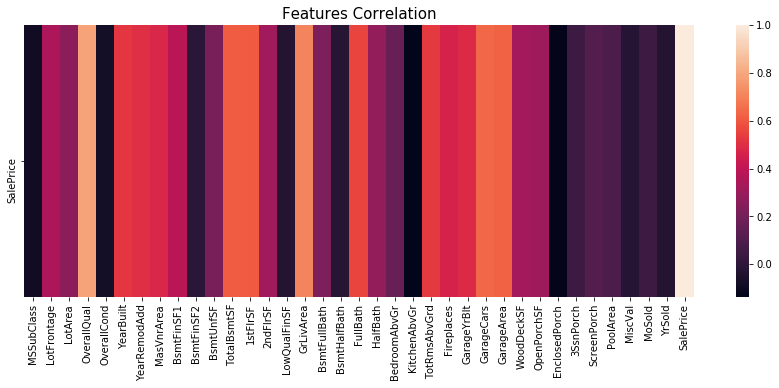

In [44]:
train_df = pd.read_csv("train.csv").drop(["Id"], axis=1)
corr = train_df.corr()
f, axis = plt.subplots(figsize=(15, 5))
sorted_corr = corr.sort_values(by=["SalePrice"], ascending=False).head(1)
sb.heatmap(sorted_corr, vmax=1.0)
plt.title("Features Correlation", fontsize=15)
plt.show()

In [45]:
resulting_cols = corr[corr["SalePrice"] > 0.05]["SalePrice"].index
resulting_cols

Index(['LotFrontage', 'LotArea', 'OverallQual', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'ScreenPorch',
       'PoolArea', 'SalePrice'],
      dtype='object')

In [46]:
for col in resulting_cols:
    percent = (train_df[col].isnull().sum() / train_df[col].isnull().count()) * 100
    if percent > 20.0:
        resulting_cols.remove(col)
resulting_cols

Index(['LotFrontage', 'LotArea', 'OverallQual', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'ScreenPorch',
       'PoolArea', 'SalePrice'],
      dtype='object')

In [47]:
train_df[resulting_cols].head()
train_data = train_df[resulting_cols]
train_data.head()

,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,ScreenPorch,PoolArea,SalePrice
0,65.0,8450,7,2003,2003,196.0,706,150,856,856,...,8,0,2003.0,2,548,0,61,0,0,208500
1,80.0,9600,6,1976,1976,0.0,978,284,1262,1262,...,6,1,1976.0,2,460,298,0,0,0,181500
2,68.0,11250,7,2001,2002,162.0,486,434,920,920,...,6,1,2001.0,2,608,0,42,0,0,223500
3,60.0,9550,7,1915,1970,0.0,216,540,756,961,...,7,1,1998.0,3,642,0,35,0,0,140000
4,84.0,14260,8,2000,2000,350.0,655,490,1145,1145,...,9,1,2000.0,3,836,192,84,0,0,250000


In [48]:
mapColsWithInteger(train_data, resulting_cols)
train_data.head()

/Users/flock/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6586: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
/Users/flock/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/Users/flock/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/index

LotFrontage: 111
LotArea: 1073
OverallQual: 10
YearBuilt: 112
YearRemodAdd: 61
MasVnrArea: 327
BsmtFinSF1: 637
BsmtUnfSF: 780
TotalBsmtSF: 721
1stFlrSF: 753
2ndFlrSF: 417
GrLivArea: 861
BsmtFullBath: 4
FullBath: 4
HalfBath: 3
BedroomAbvGr: 8
TotRmsAbvGrd: 12
Fireplaces: 4
GarageYrBlt: 98
GarageCars: 5
GarageArea: 441
WoodDeckSF: 274
OpenPorchSF: 202
ScreenPorch: 76
PoolArea: 8
SalePrice: 663


,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,ScreenPorch,PoolArea,SalePrice
0,37,327,6,104,53,128,361,73,179,134,...,6,0,90,2,220,0,49,0,0,412
1,52,498,5,77,26,0,482,167,441,427,...,4,1,63,2,149,187,0,0,0,339
2,40,702,6,102,52,104,222,278,214,178,...,4,1,88,2,260,0,30,0,0,442
3,32,489,6,19,20,0,66,346,117,208,...,5,1,85,3,284,0,24,0,0,194
4,56,925,7,101,50,221,328,318,370,347,...,7,1,87,3,380,118,70,0,0,494


In [49]:
X = train_data.drop(["SalePrice"], axis=1)
Y = train_data["SalePrice"]
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)
train_data.head()

model = RandomForestRegressor()
model.fit(x_train, y_train)

/Users/flock/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [50]:
predict_test = model.predict(x_test)

In [51]:
model.score(x_test, y_test)

0.8866504602962988

In [52]:
print('Root Mean Square Error test = ' + str(sqrt(mean_squared_error(y_test, predict_test))))

Root Mean Square Error test = 58.57611885488378
